# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data (2 features, 3 classifications)

In [5]:
np.random.seed(0)
np.random.uniform(-1,0)

-0.45118649607267525

In [46]:
df = pd.DataFrame(columns=['x1', 'x2'])
n_0, n_1, n_2 = 10, 5, 8
df['x1'] = [np.random.uniform(0,0.3) for _ in range(n_0)] + [np.random.uniform(0.98,3) for _ in range(n_1)] + [np.random.uniform(0.5,1.3) for _ in range(n_2)]
#[0.04,    1,  0.5, 0.12, 0.08, 0.02, 1.2, 0.7,  0.8]
df['x2'] = [np.random.uniform(0.09,0.5) for _ in range(n_0)] + [np.random.uniform(0.56,1) for _ in range(n_1)] + [np.random.uniform(0.55,1) for _ in range(n_2)]
#[0.42, 0.54, 0.65, 0.29, 0.38,  0.5, 0.5, 0.6, 0.55]
df['label'] = [0]*n_0 + [1]*n_1 + [2]*n_2
df

,x1,x2,label
0,0.272878,0.324776,0
1,0.064016,0.203180,0
2,0.135637,0.275666,0
3,0.279362,0.234721,0
4,0.007470,0.359534,0
5,0.180165,0.241844,0
6,0.285039,0.278228,0
7,0.069091,0.384923,0
8,0.164547,0.259327,0
9,0.272739,0.461634,0


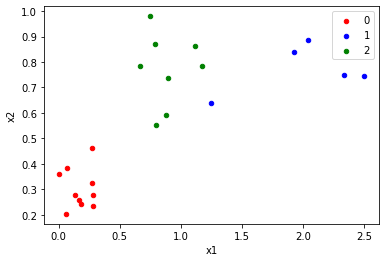

In [47]:
# visualize
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()

## one_hot_encode for categorial data (labels in classification problem)

In [48]:
### Categorical data to be converted to numeric data
labels = df.label.tolist()
unique_labels = np.unique(labels)

### map each color to an integer
mapping = {}
for x in range(len(unique_labels)):
    mapping[unique_labels[x]] = x

one_hot_encode = []

for c in labels:
    arr = list(np.zeros(len(unique_labels), dtype = int))
    arr[mapping[c]] = 1
    one_hot_encode.append(arr)
# print('label ', labels[0], ' is represented by ', one_hot_encode[0])
# print('label ', labels[40], ' is represented by ', one_hot_encode[40])
# print('label ', labels[-1], ' is represented by ', one_hot_encode[-1])

In [49]:
df['act_arr'] = one_hot_encode
df

,x1,x2,label,act_arr
0,0.272878,0.324776,0,"[1, 0, 0]"
1,0.064016,0.203180,0,"[1, 0, 0]"
2,0.135637,0.275666,0,"[1, 0, 0]"
3,0.279362,0.234721,0,"[1, 0, 0]"
4,0.007470,0.359534,0,"[1, 0, 0]"
5,0.180165,0.241844,0,"[1, 0, 0]"
6,0.285039,0.278228,0,"[1, 0, 0]"
7,0.069091,0.384923,0,"[1, 0, 0]"
8,0.164547,0.259327,0,"[1, 0, 0]"
9,0.272739,0.461634,0,"[1, 0, 0]"


# Model

## Forward Propagation
### helper functions

In [50]:
# activation function f in the hideen layer
def sigmoid(input):
    return 1 / (np.exp(-input) + 1)
# activation function g in the output layer
def softmax(inputs):
    outputs = []
    e_list = [np.exp(i) for i in inputs]
    sum_e = sum(e_list)
    for e in e_list:
        tmp = e/sum_e
        outputs.append(tmp)
    return outputs
# 'difference'
def cross_entropy(pred_arr, act_arr):
    idx = act_arr.argmax()
    #print('cross-entropy:', idx)
    #print('++++++++++:',pred_arr[idx])
    return -np.log(pred_arr[idx])

In [51]:
def forward(X, nnet_paras, act_arr):
    nnet = {
        'act_idx': [],
        'pred':[],
        'N_input':[],
        'N_output':[],
        'CE':[]
    }
    # get parameters
    Ws_InputLayer_HiddenLayer = nnet_paras['Ws_InputLayer_HiddenLayer']
    Bs_HiddenLayer = nnet_paras['Bs_HiddenLayer']
    Ws_HiddenLayer_OutputLayer = nnet_paras['Ws_HiddenLayer_OutputLayer']
    Bs_OutputLayer = nnet_paras['Bs_OutputLayer']
    
    # Hidden layer inputs
    N_inputs = []
    for w, b in zip(Ws_InputLayer_HiddenLayer.T, Bs_HiddenLayer):
        N_input = sum(X*w) + b
        N_inputs.append(N_input)
        nnet['N_input'].append(N_input)
    # Hidden layer outputs
    N_outputs = [sigmoid(N_input) for N_input in N_inputs]
    nnet['N_output'] = N_outputs
    
    # Outputlayer inputs
    O_inputs = []
    for w, b in zip(Ws_HiddenLayer_OutputLayer.T, Bs_OutputLayer):
        O_input = sum(N_outputs*w) + b
        O_inputs.append(O_input)
    # Outputlayer outputs = Pred
    O_outputs = softmax(O_inputs)
    idx = np.argmax(act_arr)
    nnet['act_idx'] = idx
    nnet['pred'] = O_outputs
    
    # cross-entropy
    CE = cross_entropy(O_outputs, np.array(act_arr))
    nnet['CE'] = CE
    
    return nnet

## Backward Propagation
### helper functions

In [52]:
def pred_sample_total(idx_O, nnet_set):  
    derivative = 0
    for i in nnet_set:
        nnet = nnet_set[i]
        act_idx = nnet['act_idx']
        pred = nnet['pred'][idx_O]
        if act_idx == idx_O:
            pred = pred - 1
        derivative = derivative + pred
    return derivative


def pred_w_N_sample(idx_N, nnet, curr_para):
    idx_O = nnet['act_idx']
    pred_ = nnet['pred'][idx_O] - 1
    w = curr_para['Ws_HiddenLayer_OutputLayer'][idx_N][idx_O]
    N_input = nnet['N_input'][idx_N]
    N = derivative_sigmoid(N_input) 
    return pred_*w*N


def derivative_sigmoid(N_input):
    f = 1/(1+np.exp(-N_input))
    return f * (1 - f)

In [53]:
def backward(X_df, nnet_set, curr_para, lr=0.5):
    n_InputLayer = len(curr_para['Ws_InputLayer_HiddenLayer'])
    n_HiddenLayer = len(curr_para['Ws_HiddenLayer_OutputLayer']) 
    n_OutputLayer = len(curr_para['Bs_OutputLayer'])
    
    # adjust output layer b
    new_Bs_OutputLayer = []
    for O in range(n_OutputLayer):
        derivative = pred_sample_total(O, nnet_set)
        tmp = curr_para['Bs_OutputLayer'][O] - lr*derivative
        new_Bs_OutputLayer.append(tmp)
        
    # adjust weights between hidden layer and output layer
    new_Ws_HiddenLayer_OutputLayer = [] 
    for N in range(n_HiddenLayer):
        hidden_outputlayer = []
        for O in range(n_OutputLayer):
            derivative = 0
            for index,X in X_df.iterrows():
                nnet = nnet_set[index]
                N_output = nnet['N_output'][N]
                idx_O = nnet['act_idx']
                pred = nnet['pred'][idx_O]                
                if idx_O == O:
                    pred = pred - 1
                derivative = derivative + pred*N_output
            tmp = curr_para['Ws_HiddenLayer_OutputLayer'][N][O] - lr*derivative 
            hidden_outputlayer.append(tmp)
        new_Ws_HiddenLayer_OutputLayer.append(hidden_outputlayer)
    
    
    # adjust hidden layer b
    new_Bs_HiddenLayer = []
    for N in range(n_HiddenLayer):
        derivative = 0
        for index, X in X_df.iterrows():
            nnet = nnet_set[index]
            predwN = pred_w_N_sample(N, nnet, curr_para)
            derivative = derivative + predwN
        tmp = curr_para['Bs_HiddenLayer'][N] - lr*derivative
        new_Bs_HiddenLayer.append(tmp)
    
    # adjust weights between input layer and hidden layer
    new_Ws_InputLayer_HiddenLayer = []
    for I in range(n_InputLayer):
        inputlayer_HiddenLayer = []
        for N in range(n_HiddenLayer):
            derivative = 0
            for index, X in X_df.iterrows():
                nnet = nnet_set[index]
                predwN = pred_w_N_sample(N, nnet, curr_para)
                derivative = derivative + predwN*X[I]
            tmp = curr_para['Ws_InputLayer_HiddenLayer'][I][N] - lr*derivative
            inputlayer_HiddenLayer.append(tmp)
        new_Ws_InputLayer_HiddenLayer.append(inputlayer_HiddenLayer)
    # update
    curr_para['Ws_InputLayer_HiddenLayer'] = np.array(new_Ws_InputLayer_HiddenLayer)
    curr_para['Bs_HiddenLayer'] =  np.array(new_Bs_HiddenLayer)
    curr_para['Ws_HiddenLayer_OutputLayer'] =  np.array(new_Ws_HiddenLayer_OutputLayer)
    
    #l = [0.41256151, new_Bs_OutputLayer[1]]
    #curr_para['Bs_OutputLayer'] =  np.array(l)#new_Bs_OutputLayer[0]) 
    return curr_para

## Training

In [54]:
n_features = 2
n_labels = 3

n_InputLayer = n_features
n_HiddenLayer = 2 
n_OutputLayer = n_labels

np.random.seed(7)
nnet_paras = {
    'Ws_InputLayer_HiddenLayer': np.random.uniform(-(1/np.sqrt(n_InputLayer)), 1/np.sqrt(n_InputLayer), size=(n_InputLayer, n_HiddenLayer)) ,
    'Bs_HiddenLayer': np.random.uniform(-(1/np.sqrt(n_HiddenLayer)), 1/np.sqrt(n_HiddenLayer), size=(n_HiddenLayer)),
    'Ws_HiddenLayer_OutputLayer': np.random.uniform(-(1/np.sqrt(n_HiddenLayer)), 1/np.sqrt(n_HiddenLayer), size=(n_HiddenLayer, n_OutputLayer)),
    'Bs_OutputLayer': np.random.uniform(-(1/np.sqrt(n_OutputLayer)), 1/np.sqrt(n_OutputLayer), size=(n_OutputLayer))
}

In [55]:
print(nnet_paras)

{'Ws_InputLayer_HiddenLayer': array([[-0.59919056,  0.39586495],
       [-0.0871025 ,  0.31602749]]), 'Bs_HiddenLayer': array([0.67597925, 0.05444138]), 'Ws_HiddenLayer_OutputLayer': array([[ 1.58457490e-03, -6.05211091e-01, -3.27476735e-01],
       [-1.66168926e-04,  2.53469491e-01,  4.29551864e-01]]), 'Bs_OutputLayer': array([-0.13747734, -0.50121353, -0.24462839])}


In [56]:
df

,x1,x2,label,act_arr
0,0.272878,0.324776,0,"[1, 0, 0]"
1,0.064016,0.203180,0,"[1, 0, 0]"
2,0.135637,0.275666,0,"[1, 0, 0]"
3,0.279362,0.234721,0,"[1, 0, 0]"
4,0.007470,0.359534,0,"[1, 0, 0]"
5,0.180165,0.241844,0,"[1, 0, 0]"
6,0.285039,0.278228,0,"[1, 0, 0]"
7,0.069091,0.384923,0,"[1, 0, 0]"
8,0.164547,0.259327,0,"[1, 0, 0]"
9,0.272739,0.461634,0,"[1, 0, 0]"


In [57]:
iter = 0
max_iter = 50


CE_total_list = []
while iter < max_iter:
    print('iter at:', iter)
    # current net
    nnet_set = {}
    ### FORWARD
    CE_total = 0
    for index, row in df.iterrows():
        X = row.iloc[:-2].tolist()
        act_arr = row.iloc[-1]
        nnet = forward(X, nnet_paras, act_arr)
        CE_total = CE_total + nnet['CE']
        
        nnet_set[index] = nnet
    print('CE total:', CE_total)
    CE_total_list.append(CE_total)
    
    ### BACKWARD
    nnet_paras = backward(df, nnet_set, nnet_paras)
    
    ####
    iter += 1
    print('========================')

iter at: 0
CE total: 23.731049655096246
iter at: 1
CE total: 22.55143047058027
iter at: 2
CE total: 24.22280469424476
iter at: 3
CE total: 26.055417210804425
iter at: 4
CE total: 17.49364921819172
iter at: 5
CE total: 17.19910539481538
iter at: 6
CE total: 16.98448252341728
iter at: 7
CE total: 16.822606483471546
iter at: 8
CE total: 16.695825994925674
iter at: 9
CE total: 16.593534777480258
iter at: 10
CE total: 16.509038110600283
iter at: 11
CE total: 16.437899240772165
iter at: 12
CE total: 16.377056518278394
iter at: 13
CE total: 16.3243261101799
iter at: 14
CE total: 16.278106949761554
iter at: 15
CE total: 16.237197695020907
iter at: 16
CE total: 16.20067883554047
iter at: 17
CE total: 16.167834313458055
iter at: 18
CE total: 16.138097980801305
iter at: 19
CE total: 16.11101615214596
iter at: 20
CE total: 16.08622086791492
iter at: 21
CE total: 16.063410452443108
iter at: 22
CE total: 16.042335143466886
iter at: 23
CE total: 16.022786312629275
iter at: 24
CE total: 16.00458827107

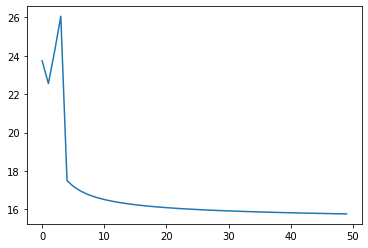

In [58]:
plt.plot(CE_total_list)
plt.show()